In [1]:
import matplotlib.pyplot as plt
import numpy as np

from metpy.calc import get_wind_components
from metpy.plots import SkewT

In [2]:
# Parse the data
p, T, Td, direc, spd = np.loadtxt('../testdata/sounding_data.txt',
        usecols=(0, 2, 3, 6, 7), unpack=True)
u, v = get_wind_components(spd, direc)

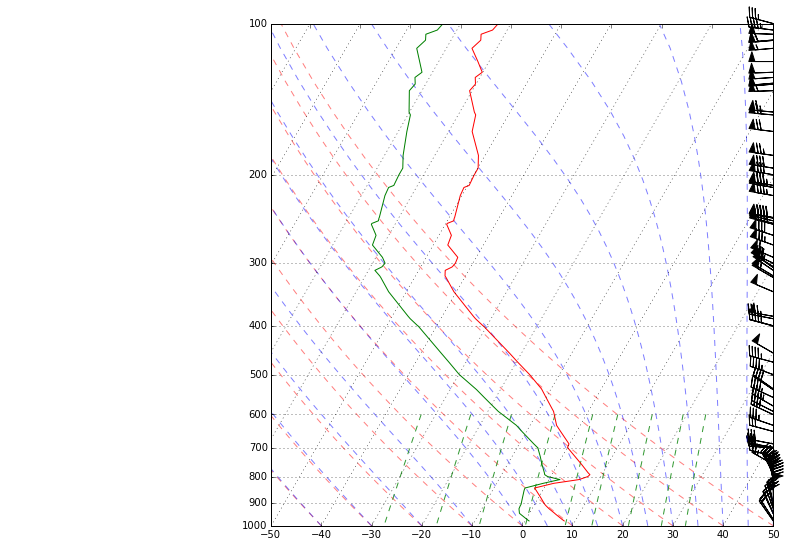

In [3]:
# Create a new figure. The dimensions here give a good aspect ratio
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p, u, v)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.set_ylim(1000, 100)

# Show the plot
plt.show()